random data generation

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

A=np.random.randint(2,size=(5,8))
x=np.random.random((8,1))*2
e=np.random.random((5,1))
y=np.dot(A,x)+e

regression

In [ ]:
def reg(D,y,bool):
  reg= LinearRegression()
  reg.fit(D,y)
  if(bool):
    print(reg.coef_[0]," ",reg.intercept_[0])
  print(reg.score(D,y))

In [ ]:
y

array([[5.93138064],
       [3.3240303 ],
       [3.97306607],
       [5.14832005],
       [5.97124821]])

In [ ]:
x

array([[0.102874  ],
       [1.61566343],
       [0.84876912],
       [0.26176176],
       [1.96207441],
       [0.30983541],
       [1.61079484],
       [0.89474482]])

In [ ]:
A

array([[0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1]])

In [ ]:
reg(A,y,True)

[-6.81961910e-01  2.22044605e-16  4.39896981e-01  9.80892641e-01
  5.40995660e-01 -2.45535642e-01  1.22642828e+00  1.40966250e-01]   3.428599694177772
1.0


Removing features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
k=0.3
sel = VarianceThreshold(threshold=k*(1-k))
D=sel.fit_transform(A)
D

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 0],
       [0, 1, 1, 1]])

In [ ]:
reg(D,y,True)

[-0.70708034  0.29201073  1.61922521 -0.62013414]   4.312155425018288
0.9034672493582163


Univariate feature selection

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)

reg(X,y,False)

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

reg(X_new,y,False)

0.9303939218549564
0.9257451172622505


Feature selection using SelectFromModel

L1-based feature selection

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
reg(X,y,False)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# dual=False when n_samples > n_features.
# l2 the same
# 
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
reg(X_new,y,False)

0.9303939218549564
0.9104228990155748


Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
reg(X,y,False)

clf = ExtraTreesClassifier(n_estimators=50)
# n The number of trees in the forest.
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
reg(X_new,y,False)

0.9303939218549564
0.9257451172622505


forward and backward

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [ ]:
sfs.get_support()

array([ True, False,  True,  True])

In [ ]:
sfs.transform(X).shape

(150, 3)

knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

In [ ]:
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12345 )
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



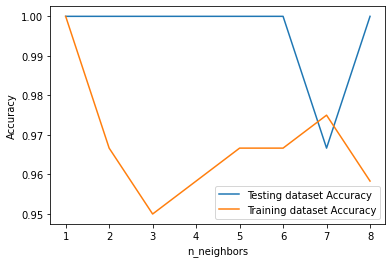

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)
 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


